# Data Import

## Import user data from JSON files

In [ ]:
import json
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
shared_folder_path = '/content/drive/My Drive/LNL projects/RFV metric data/dfp_GA4_daily_user_exports'

# List files to check the files inside the folder
json_files = os.listdir(shared_folder_path)

In [ ]:
#Example for just the first json file in the list
file_path = f"{shared_folder_path}/{json_files[0]}"

with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]

print(data)
tmp_dict = dict.fromkeys(list((data[0]).keys()),)

[{'pseudo_user_id': '918521256.1722311194', 'stream_id': '6228347800', 'user_info': {'last_active_timestamp_micros': 1722311201000272, 'user_first_touch_timestamp_micros': 1722211200000000, 'first_purchase_date': None}, 'device': {'operating_system': 'web', 'category': 'mobile', 'mobile_brand_name': None, 'mobile_model_name': None, 'unified_screen_name': 'Michelle Aslam, Author at Dallas Free Press'}, 'geo': {'city': 'Richardson', 'country': 'United States', 'continent': 'Americas', 'region': 'Texas'}, 'audiences': [{'id': 6228365118, 'name': 'All Users', 'membership_start_timestamp_micros': 1722311194000000, 'membership_expiry_timestamp_micros': 1768967201000000, 'npa': False}], 'user_properties': [], 'user_ltv': {'revenue_in_usd': None, 'sessions': 1, 'engagement_time_millis': 5542, 'purchases': None, 'engaged_sessions': None, 'session_duration_micros': 6747049}, 'predictions': {'in_app_purchase_score_7d': None, 'purchase_score_7d': None, 'churn_score_7d': None, 'revenue_28d_in_usd':

In [ ]:
tmp = pd.DataFrame(tmp_dict)

ValueError: If using all scalar values, you must pass an index

In [ ]:
tem = []

for n in range(len(json_files)):
  file_path = f"{shared_folder_path}/{json_files[n]}"
  with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]
  for i in range(len(data)):
    tem_dict={}
    tem_dict = {
        'pseudo_user_id': data[i]['pseudo_user_id'],
        'stream_id': data[i]['stream_id'],
        'user_last_active_timestamp_micros': data[i]['user_info']['last_active_timestamp_micros'],
        'user_first_touch_timestamp_micros': data[i]['user_info']['user_first_touch_timestamp_micros'],
        'user_first_purchase_date': data[i]['user_info']['first_purchase_date'],
        'device_category': data[i]['device']['category'],
        'city': data[i]['geo']['city'],
        'region': data[i]['geo']['region'],
        'country': data[i]['geo']['country'],
        'continent': data[i]['geo']['continent'],
        'operating_system': data[i]['device']['operating_system'],
        'mobile_brand_name': data[i]['device']['mobile_brand_name'],
        'mobile_model_name': data[i]['device']['mobile_model_name'],
        'unified_screen_name': data[i]['device']['unified_screen_name'],
        'user_ltv_revenue_in_usd': data[i]['user_ltv']['revenue_in_usd'],
        'user_ltv_sessions' : data[i]['user_ltv']['sessions'],
        'user_ltv_engagement_time_millis' : data[i]['user_ltv']['engagement_time_millis'],
        'user_ltv_purchases' : data[i]['user_ltv']['purchases'],
        'user_ltv_engaged_sessions' : data[i]['user_ltv']['engaged_sessions'],
        'user_ltv_session_duration_micros' : data[i]['user_ltv']['session_duration_micros'],
        'occurrence_date': data[i]['occurrence_date'],
        'last_updated_date': data[i]['last_updated_date']
        }
    tem.append(tem_dict)

  df = pd.DataFrame(tem)

In [ ]:
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'])
df['occurrence_date'] = pd.to_datetime(df['occurrence_date'])

In [ ]:
len(df[df['occurrence_date'] == '2024-08-05']['pseudo_user_id'].unique()), len(df[df['occurrence_date'] == '2024-08-05'])

(107, 107)

In [ ]:
df.drop('user_first_purchase_date', axis=1, inplace=True)

In [ ]:
df.columns, df.shape

(Index(['pseudo_user_id', 'stream_id', 'user_last_active_timestamp_micros',
        'user_first_touch_timestamp_micros', 'user_first_purchase_date',
        'device_category', 'city', 'region', 'country', 'continent',
        'operating_system', 'mobile_brand_name', 'mobile_model_name',
        'unified_screen_name', 'user_ltv_revenue_in_usd', 'user_ltv_sessions',
        'user_ltv_engagement_time_millis', 'user_ltv_purchases',
        'user_ltv_engaged_sessions', 'user_ltv_session_duration_micros',
        'occurrence_date', 'last_updated_date'],
       dtype='object'),
 (4436, 22))

In [ ]:
# Change these two columns into datatime type
df['last_active_date'] = pd.to_datetime(df['user_last_active_timestamp_micros'], unit='us').dt.date
df['first_visit_date'] = pd.to_datetime(df['user_first_touch_timestamp_micros'], unit='us')

In [ ]:
# Change these two columns into minutes
df['ltv_session_duration_mins'] = df['user_ltv_session_duration_micros'] / (1000*60000)
df['ltv_engaged_duration_mins'] = df['user_ltv_engagement_time_millis'] / 60000

In [ ]:
# Impute 0 into null entries
df['ltv_session_duration_mins'] = df['ltv_session_duration_mins'].fillna(0)
df['ltv_engaged_duration_mins'] = df['ltv_engaged_duration_mins'].fillna(0)

In [ ]:
df['user_ltv_sessions'].isna().sum()

Dropping the users records that have 0 in ```user_ltv_sessions```

In [ ]:
df = df.dropna(subset=['user_ltv_sessions'])
df['user_ltv_sessions'].isna().sum()

In [ ]:
df['user_ltv_engaged_sessions'].isna().sum()

In [ ]:
df[df['user_ltv_engaged_sessions'] == 0]

In [ ]:
#Fill 0 for those who have nan in engaged sessions
df['user_ltv_engaged_sessions'].fillna(0, inplace=True)
df['user_ltv_engaged_sessions'].isna().sum()

In [ ]:
df.shape

In [ ]:
(df['occurrence_date'] == df['last_updated_date']).sum()

The ```user_ltv_revenue_in_usd``` column has a number either nan or 0, so we removed this column

In [ ]:
df[df['user_ltv_revenue_in_usd'].notna()]

In [ ]:
df[df['user_ltv_revenue_in_usd'].notna()]['user_ltv_revenue_in_usd'].sum()

In [ ]:
#Check the mobile model name if nan
df['mobile_model_name'].isna().sum()

Reordering the columns that we need for modling

In [ ]:
df.columns
df = df[['pseudo_user_id', 'last_active_date',
        'device_category', 'city',
       'region', 'country', 'continent', 'operating_system',
       'mobile_brand_name', 'unified_screen_name',
      'ltv_engaged_duration_mins','ltv_session_duration_mins','user_ltv_sessions',
       'user_ltv_engaged_sessions',
       'occurrence_date',
       'first_visit_date']]
df.shape

The ```df``` dataset holds all of the important user data everytime the user visited the site. There are duplicate user id's if the user visited more than once during that 44 day period.

## Import RFV file

In [ ]:
shared_folder_path_rfv = '/content/drive/My Drive/LNL projects/RFV metric data'

file_path_rfv_updated = f"{shared_folder_path_rfv}/20240807_updated.csv"

df_rfv = pd.read_csv(file_path_rfv_updated)

In [ ]:
df_rfv.dtypes['pseudo_user_id'], df.dtypes['pseudo_user_id']

(dtype('float64'), dtype('O'))

In [ ]:
df['pseudo_user_id'] = df['pseudo_user_id'].astype(float)
df_rfv.dtypes['pseudo_user_id'], df.dtypes['pseudo_user_id']

(dtype('float64'), dtype('float64'))

In [ ]:
df_rfv[~df_rfv['pseudo_user_id'].isin(df['pseudo_user_id'])]

,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
2,2.602055e+08,6228347800,2024-06-25,2214.0,NaN,2214.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
5,2.022032e+09,6228347800,2024-06-25,4506.0,NaN,4506.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
6,1.253127e+09,6228347800,2024-06-25,85461.0,3.0,85461.0,3.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
7,1.414487e+09,6228347800,2024-06-25,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
8,3.180366e+08,6228347800,2024-06-25,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,1.531809e+09,6228347800,2024-08-07,13454.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3944,1.897731e+09,6228347800,2024-08-07,120884.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3952,1.007599e+09,6228347800,2024-08-07,12759.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3953,1.190453e+08,6228347800,2024-08-07,67139.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1


In [ ]:
df_rfv.columns

Index(['pseudo_user_id', 'stream_id', 'first_appearance',
       'leading.user_ltv.engagement_time_millis',
       'leading.user_ltv.engaged_sessions',
       'trailing.user_ltv.engagement_time_millis',
       'trailing.user_ltv.engaged_sessions', 'Recency', 'Normalized_Recency',
       'Frequency', 'Normalized_Frequency', 'Volume', 'Normalized_Volume',
       'Regularity', 'Normalized_Regularity', 'RFV', 'RFV_Tier'],
      dtype='object')

There are 1588 users records only in ```df_rfv``` dataframe. We won't include these rows in ```df```, since ```df_rfv``` doesn't include all of the columns in ```df```.

In [ ]:
#merge RFV info on df. Keep records only present in df
df = pd.merge(df, df_rfv[['pseudo_user_id', 'Recency', 'Normalized_Recency',
       'Frequency', 'Normalized_Frequency', 'Volume', 'Normalized_Volume',
       'Regularity', 'Normalized_Regularity', 'RFV', 'RFV_Tier']], on='pseudo_user_id', how='left')
df.shape

(4389, 26)

# Dependent Variable

The dependen variable ('returned') will be a boolean variable taht indicates whether a given user has returned at all. Need to consider sessions before the 44 day period. So create y based on 'user_ltv_sessions'.

In [ ]:
df['returned'] = df['user_ltv_sessions'] > 1

Only using data only based on the latest data we have avaliable since that will be the final data we have for each user.

In [ ]:
#Create df to use for modeling that contains only earliest session data
df_earliest = df.loc[df.groupby('pseudo_user_id')['occurrence_date'].idxmin()].reset_index(drop=True)
df_latest = df.loc[df.groupby('pseudo_user_id')['occurrence_date'].idxmax()].reset_index(drop=True)
len(df['pseudo_user_id'].unique()) - len(df_latest) #all users accounted for

0

## Do not use (old dependent variable)

This dependent variable ('returned_7_days'), will be a boolean variable that indicates whether a given user has returned within 7 days after their first visit to the website. Same as Terea's thesiss, we focused on the first- visit data because we require this information before prediciting the target and the return on the second visit.

**Things to consider:** We only have lifetime user data and not each inidividaul event whenever a user visited the site, which is what Teresa had. Makes more sense to use data from each individual event (data for when a user visits the site, and not aggregate data over lifetime) since it's how the user reacted with the site the first time they visited would affect the next time they visited.

In [ ]:
# Temporary dataframe that contains users earliest visit date, second earlist visit date and last visit date
users_dates = df.groupby('pseudo_user_id')['occurrence_date'].agg(
    first_session='first', #first visit
    second_session=lambda x: x.iloc[1] if len(x) > 1 else x.iloc[0], #If there is only one visit, second_visit_date will return same date of earliest date
    #This column is used to calculate if a user returned in 7 days in later part (second_visit_date - earliest <= 7)
    last_session='last' #last visit date
).reset_index()
users_dates

,pseudo_user_id,first_session,second_session,last_session
0,3.854362e+05,2024-08-07,2024-08-07,2024-08-07
1,7.463002e+05,2024-07-09,2024-07-09,2024-07-09
2,1.516217e+06,2024-07-30,2024-07-30,2024-07-30
3,1.674153e+06,2024-06-25,2024-06-25,2024-06-25
4,2.907570e+06,2024-07-06,2024-07-06,2024-07-06
...,...,...,...,...
3914,2.146264e+09,2024-07-07,2024-07-07,2024-07-07
3915,2.146288e+09,2024-07-05,2024-07-05,2024-07-05
3916,2.146490e+09,2024-07-18,2024-07-18,2024-07-18
3917,2.146922e+09,2024-06-25,2024-06-25,2024-06-25


In [ ]:
users_dates['returned_within_7_days'] = (
    (users_dates['second_session'] - users_dates['first_session']).dt.days <= 7
) & (
    (users_dates['second_session'] - users_dates['first_session']).dt.days != 0
)
users_dates

,pseudo_user_id,first_session,second_session,last_session,returned_within_7_days
0,3.854362e+05,2024-08-07,2024-08-07,2024-08-07,False
1,7.463002e+05,2024-07-09,2024-07-09,2024-07-09,False
2,1.516217e+06,2024-07-30,2024-07-30,2024-07-30,False
3,1.674153e+06,2024-06-25,2024-06-25,2024-06-25,False
4,2.907570e+06,2024-07-06,2024-07-06,2024-07-06,False
...,...,...,...,...,...
3914,2.146264e+09,2024-07-07,2024-07-07,2024-07-07,False
3915,2.146288e+09,2024-07-05,2024-07-05,2024-07-05,False
3916,2.146490e+09,2024-07-18,2024-07-18,2024-07-18,False
3917,2.146922e+09,2024-06-25,2024-06-25,2024-06-25,False


Now that we have our dependent variable, we want to only focus on the data from the first session. Then merge the dependent variable onto ```df_earliest```.

In [ ]:
#Merge dependent variable
df_earliest = df_earliest.merge(
    users_dates[['pseudo_user_id', 'returned_within_7_days']],
    on='pseudo_user_id',
    how='left'
)
df_earliest

,pseudo_user_id,last_active_date,device_category,city,region,country,continent,operating_system,mobile_brand_name,unified_screen_name,...,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier,returned,returned_within_7_days
0,3.854362e+05,2024-08-08,mobile,Daphne,Alabama,United States,Americas,web,Apple,35th Texas Black Invitational Rodeo - Dallas F...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,True,False
1,7.463002e+05,2024-07-09,mobile,Dallas,Texas,United States,Americas,web,Apple,Los Gallos: A gym from West Dallas where boxin...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,False,False
2,1.516217e+06,2024-07-30,mobile,,Texas,United States,Americas,web,Apple,Pointe South Revitalization Committee Invites ...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,False,False
3,1.674153e+06,2024-06-25,desktop,Boydton,Virginia,United States,Americas,web,Apple,Dallas Free Press amplifies voices in South an...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,2.907570e+06,2024-07-06,mobile,Dallas,Texas,United States,Americas,web,BLU,Circuit's ride-share service gives West Dallas...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2.146264e+09,2024-07-07,mobile,Dallas,Texas,United States,Americas,web,Samsung,Boots & Bling Rodeo Kick-Off Party - Dallas Fr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3915,2.146288e+09,2024-07-05,desktop,,,China,Asia,web,Google,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3916,2.146490e+09,2024-07-18,desktop,San Jose,California,United States,Americas,web,Google,Dallas Free Press amplifies voices in South an...,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,False,False
3917,2.146922e+09,2024-06-26,mobile,Santa Barbara,California,United States,Americas,web,Apple,West Dallas Events - Dallas Free Press,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1,False,False


In [ ]:
df_earliest.columns

Index(['pseudo_user_id', 'last_active_date', 'device_category', 'city',
       'region', 'country', 'continent', 'operating_system',
       'mobile_brand_name', 'unified_screen_name', 'ltv_engaged_duration_mins',
       'ltv_session_duration_mins', 'user_ltv_sessions',
       'user_ltv_engaged_sessions', 'occurrence_date', 'first_visit_date',
       'Recency', 'Normalized_Recency', 'Frequency', 'Normalized_Frequency',
       'Volume', 'Normalized_Volume', 'Regularity', 'Normalized_Regularity',
       'RFV', 'RFV_Tier', 'returned', 'returned_within_7_days'],
      dtype='object')

Use ```df_earliest``` for now on.

# Data Preprocessing

## Handling Missing Values

This is from Teresa's method:
*Once aggregated, missing data is handled with mean imputation for continuous variables, and the missing value is filled with ‘other’ for categorical variables. To ensure consistency in the analysis, inactive users (less than 10%) and users with multiple first sessions (6) have been dropped.*

For our purposes, we will be using the same method to handle outliers. We could also use KNN imputation. The missing value is credited based on its neighbours’ average (or majority class).

**To discuss: not sure on definition of "inactive user" and not sure how to tell if a user has multiple first sessions. Maybe differet ID's but same person and was able to tell based on machine used to access site?

In [ ]:
#Check the number and percentage of missing values for each column
missing_data = pd.DataFrame({
    'Missing Count': df_latest.isnull().sum(),
    'Missing Percentage': df_latest.isnull().sum() / len(df) * 100,
    'Data types': df_latest.dtypes
})

missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False).reset_index()
missing_data

,index,Missing Count,Missing Percentage,Data types
0,Recency,1550,35.315562,float64
1,RFV,1550,35.315562,float64
2,RFV_Tier,1550,35.315562,object
3,Normalized_Frequency,1550,35.315562,float64
4,Volume,1550,35.315562,float64
5,Normalized_Volume,1550,35.315562,float64
6,Regularity,1550,35.315562,float64
7,Normalized_Regularity,1550,35.315562,float64
8,Normalized_Recency,1550,35.315562,float64
9,Frequency,1550,35.315562,float64


In [ ]:
#data types as a list
types_list = list(missing_data['Data types'].unique())
types_list[0], types_list[1]

(dtype('float64'), dtype('O'))

Fill in missing values with mean for the continous columns and 'other' for categorical columns.

In [ ]:
#list of continous columns with missing values
#not including categorical columns
missing_continous = missing_data[(missing_data['Missing Count'] > 0) & (missing_data['Data types'] == types_list[0])]['index'].to_list()
missing_categorical = missing_data[(missing_data['Missing Count'] > 0) & (missing_data['Data types'] == types_list[1])]['index'].to_list()

In [ ]:
# Fill missing values with the mean for multiple continuous columns
df_latest[missing_continous] = df_latest[missing_continous].apply(lambda x: x.fillna(x.mean()))
df_latest[missing_categorical] = df_latest[missing_categorical].fillna('other')

In [ ]:
#There are also some city variabels that have nothing. Leave as is
sum(df_latest['city'] == "")

341

In [ ]:
#drop operating_system since there is only one value which is ok
print(df_latest['operating_system'].unique())
df_latest.drop(columns=['operating_system'], inplace=True)

['web']


In [ ]:
pd.DataFrame({
    'Missing Count': df_latest.isnull().sum(),
    'Missing Percentage': df_latest.isnull().sum() / len(df) * 100,
    'Data types': df_latest.dtypes
})

,Missing Count,Missing Percentage,Data types
pseudo_user_id,0,0.0,float64
last_active_date,0,0.0,object
device_category,0,0.0,object
city,0,0.0,object
region,0,0.0,object
country,0,0.0,object
continent,0,0.0,object
mobile_brand_name,0,0.0,object
unified_screen_name,0,0.0,object
ltv_engaged_duration_mins,0,0.0,float64


## Outliers

Because of higly right-skewed distribution, standard methods like the Interquartile Range (IQR) rule and Z-score method may not be ideal to find outliers because they assume a relatively symmetric distribution. We cannnot use Box-Cox Transformation as well, since it requires all values to be strictly positive (Greater than 0).

For heavily skewed distributions, top 1% or 5% of values may be considered outliers instead of using a fixed rule.

So we define number of ```user_ltv_sessions``` larger than 99 percentile are outliers.



In [ ]:
upper_limit = df_latest['user_ltv_sessions'].quantile(0.99)
upper_limit, sum(df_latest['user_ltv_sessions']==1), df_latest.shape[0] - sum(df_latest['user_ltv_sessions'] ==1)

(np.float64(8.0), 3325, 594)

In [ ]:
df_latest_capped = df_latest[df_latest['user_ltv_sessions'] <= upper_limit]
df_latest_capped.reset_index(inplace= True, drop=True)
df_latest_capped

,pseudo_user_id,last_active_date,device_category,city,region,country,continent,mobile_brand_name,unified_screen_name,ltv_engaged_duration_mins,...,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier,returned
0,3.854362e+05,2024-08-08,mobile,Daphne,Alabama,United States,Americas,Apple,35th Texas Black Invitational Rodeo - Dallas F...,0.126300,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,True
1,7.463002e+05,2024-07-09,mobile,Dallas,Texas,United States,Americas,Apple,Los Gallos: A gym from West Dallas where boxin...,0.068150,...,0.033333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,False
2,1.516217e+06,2024-07-30,mobile,,Texas,United States,Americas,Apple,Pointe South Revitalization Committee Invites ...,0.063167,...,0.733333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,False
3,1.674153e+06,2024-06-25,desktop,Boydton,Virginia,United States,Americas,Apple,Dallas Free Press amplifies voices in South an...,1.794217,...,0.416828,0.064584,0.002808,5558.688476,0.002311,1.088223,0.005882,0.007678,other,False
4,2.907570e+06,2024-07-06,mobile,Dallas,Texas,United States,Americas,BLU,Circuit's ride-share service gives West Dallas...,0.265517,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,2.146264e+09,2024-07-07,mobile,Dallas,Texas,United States,Americas,Samsung,Boots & Bling Rodeo Kick-Off Party - Dallas Fr...,0.917517,...,0.416828,0.064584,0.002808,5558.688476,0.002311,1.088223,0.005882,0.007678,other,False
3877,2.146288e+09,2024-07-05,desktop,,,China,Asia,Google,other,7.829583,...,0.416828,0.064584,0.002808,5558.688476,0.002311,1.088223,0.005882,0.007678,other,False
3878,2.146490e+09,2024-07-18,desktop,San Jose,California,United States,Americas,Google,Dallas Free Press amplifies voices in South an...,0.866833,...,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,False
3879,2.146922e+09,2024-06-26,mobile,Santa Barbara,California,United States,Americas,Apple,West Dallas Events - Dallas Free Press,0.162117,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,T1,False


## Skewness Visualizations

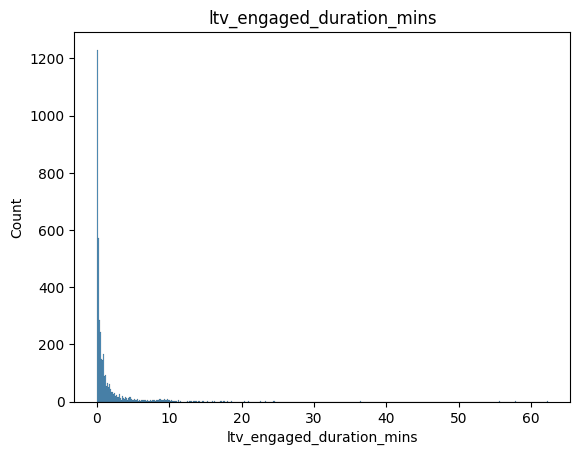

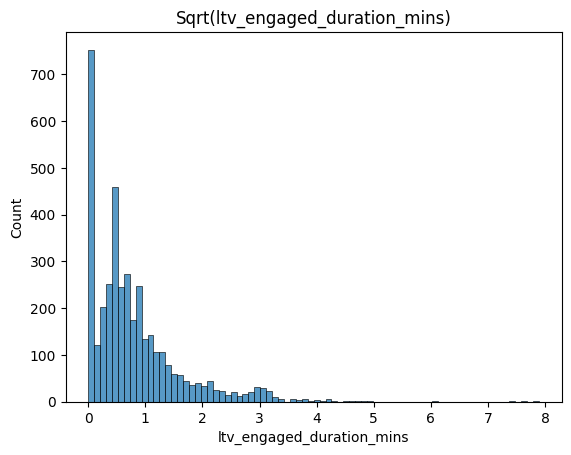

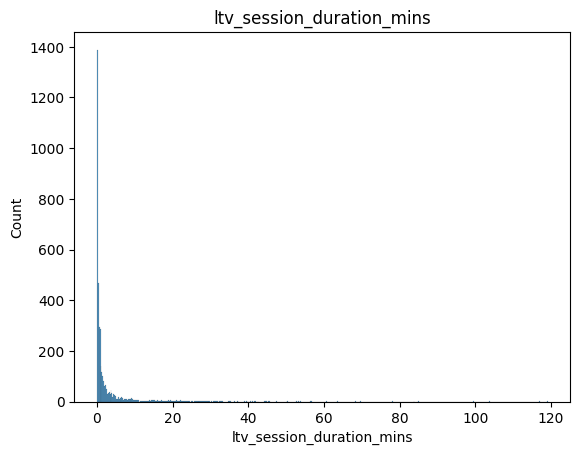

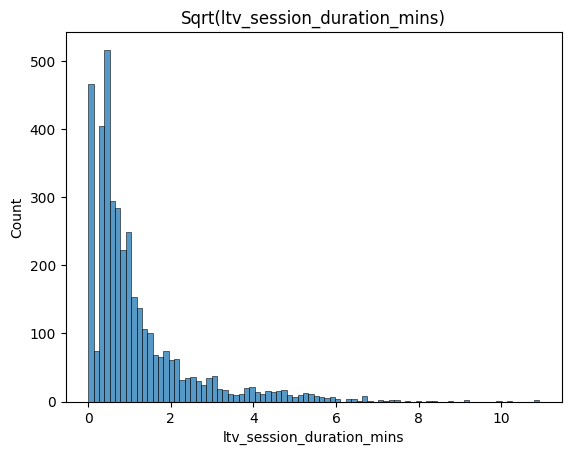

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#checking engaged duration minutes
sns.histplot(data=df_latest_capped, x="ltv_engaged_duration_mins")
plt.title("ltv_engaged_duration_mins")
plt.show()
sns.histplot(np.sqrt(df_latest_capped['ltv_engaged_duration_mins']))
plt.title("Sqrt(ltv_engaged_duration_mins)")
plt.show()

#checking session duration minutes
sns.histplot(data=df_latest_capped, x="ltv_session_duration_mins")
plt.title("ltv_session_duration_mins")
plt.show()
sns.histplot(np.sqrt(df_latest_capped['ltv_session_duration_mins']))
plt.title("Sqrt(ltv_session_duration_mins)")
plt.show()

Check the transformed data for "ltv_engaged_duration_mins" and "ltv_session_duration_mins". Log transformation wasn't powerful enough to try and fix the skewness but square worked better as shown in the graphs above. Transform the 2 columns.

Graphs are here for visualizations but will not transform the columns because it would be hard to interpret in the decesion tree model.

##  Feature engineering process

``` first_visit_date```,```occurrence_date``` and ```last_active_date```

Create a month column for the 3 date columns. Don't think we should use in our decision tree since data is only for 44 days so only 2 months.

In [ ]:
df_latest_capped['first_visit_month'] = df_latest_capped['first_visit_date'].dt.month

df_latest_capped['occurrence_date_month'] = df_latest_capped['occurrence_date'].dt.month

df_latest_capped['last_active_date'] = pd.to_datetime(df_latest_capped['last_active_date'])
df_latest_capped['last_active_date_month'] = df_latest_capped['last_active_date'].dt.month

<ipython-input-45-c6056d953aed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['first_visit_month'] = df_latest_capped['first_visit_date'].dt.month
<ipython-input-45-c6056d953aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['occurrence_date_month'] = df_latest_capped['occurrence_date'].dt.month
<ipython-input-45-c6056d953aed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

For ```device_type```

In [ ]:
df_latest_capped['device_category'].value_counts()

,count
device_category,
mobile,2007
desktop,1839
tablet,34
smart tv,1


First, we combined the users using tablet and smart tv into `other` category

In [ ]:
df_latest_capped['device_category'] = df_latest_capped['device_category'].replace(['tablet', 'smart tv'], 'other')
df_latest_capped['device_category'].value_counts()

<ipython-input-47-6fed6325a506>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['device_category'] = df_latest_capped['device_category'].replace(['tablet', 'smart tv'], 'other')


,count
device_category,
mobile,2007
desktop,1839
other,35


Then encode each device type into numerical values, such as if user use mobile it will shows 1 in ```device_category``` column

In [ ]:
df_latest_capped['device_category']= df_latest_capped['device_category'].replace(['mobile','desktop','other'],[1,2,3])

<ipython-input-48-bf25dc364bfe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_latest_capped['device_category']= df_latest_capped['device_category'].replace(['mobile','desktop','other'],[1,2,3])
<ipython-input-48-bf25dc364bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['device_category']= df_latest_capped['device_category'].replace(['mobile','desktop','other'],[1,2,3])


For ```mobile_brand_name```

values are combined to 'apple', 'Google', 'Samsung', 'Microsoft', 'Motorola' and 'other'

In [ ]:
df_latest_capped ['mobile_brand_name'].value_counts()

,count
mobile_brand_name,
Apple,1903
Google,848
Samsung,536
Microsoft,235
Motorola,107
other,61
Mozilla,54
T-Mobile,21
OnePlus,20


In [ ]:
df_latest_capped['mobile_brand_name'] = df_latest_capped['mobile_brand_name'].replace(['BLU', 'Xiaomi',
       'LG', 'Mozilla', 'TCL', 'Vivo', 'other', 'Phonemax',
       'Opera Software', 'OnePlus', 'AT&T', 'T-Mobile', 'Nuu', 'Amazon',
       'Realme', 'Wiko', 'Nokia', 'Alcatel', 'JVC', 'Boost Mobile', 'ZZB',
       'Wingtech', 'Hot Pepper', 'Cricket', 'Koobee', 'ZTE', 'Vortex',
       'Schok', 'Cloud Mobile', 'Asus', 'Lenovo', 'Maxwest', 'Blackview'], 'Other')
df_latest_capped['mobile_brand_name'].value_counts()

<ipython-input-50-da76ab6adf7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['mobile_brand_name'] = df_latest_capped['mobile_brand_name'].replace(['BLU', 'Xiaomi',


,count
mobile_brand_name,
Apple,1903
Google,848
Samsung,536
Other,252
Microsoft,235
Motorola,107


In [ ]:
df_latest_capped['mobile_brand_name']= df_latest_capped['mobile_brand_name'].replace(['Apple','Google','Samsung','Other','Microsoft','Motorola'],[1,2,3,4,5,6])

<ipython-input-51-41937fdb9b20>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_latest_capped['mobile_brand_name']= df_latest_capped['mobile_brand_name'].replace(['Apple','Google','Samsung','Other','Microsoft','Motorola'],[1,2,3,4,5,6])
<ipython-input-51-41937fdb9b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['mobile_brand_name']= df_latest_capped['mobile_brand_name'].replace(['Apple','Google','Samsung','Other','Microsoft','Motorola'],[1,2,3,4,5,6])


In [ ]:
df_latest_capped['mobile_brand_name'].value_counts()

,count
mobile_brand_name,
1,1903
2,848
3,536
4,252
5,235
6,107


Geographical Category

created 4 new bool columns called ```city_dallas```, ```state_texas```, ```country_us```, ```international``` to replace original city, region, country,continent columns

In [ ]:
metro_areas = ['Plano','Irving','Garland', 'Grand Prairie','Carrollton', 'Richardson','Mesquite','McKinney','Frisco','Allen', 'Denton',
'Lewisville', 'The Colony', 'Farmers Branch', 'Grapevine','Coppell','Rowlett','Rockwall','Sunnyvale','Wylie','Forney',
'Sachse','University Park','Highland Park', 'Addison', 'Balch Springs', 'Seagoville','Wilmer']

In [ ]:
new_values = []
for index, row in df_latest_capped.iterrows():
    if row['city'] == 'Dallas':
        new_values.append(1) # city_Dallas
    elif row['city'] in (metro_areas):
        new_values.append(2) # metro area
    elif row['region'] == 'Texas':
        new_values.append(3) # state_texas
    elif row['country'] == 'United States':
        new_values.append(4) #country_us
    else:
        new_values.append(5) #international

df_latest_capped['geo_category'] = new_values

<ipython-input-54-11d357379f51>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['geo_category'] = new_values


Dealing with the collinearity of sessions and engaged sessions since *sessions = enagaged + not engaged*. So create a new column called ```user_ltv_not_engaged_sessions``` which is all of the not engaged sessions.


In [ ]:
df_latest_capped['user_ltv_not_engaged_sessions'] = df_latest_capped['user_ltv_sessions'] - df_latest_capped['user_ltv_engaged_sessions']

<ipython-input-55-cd35d7219be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest_capped['user_ltv_not_engaged_sessions'] = df_latest_capped['user_ltv_sessions'] - df_latest_capped['user_ltv_engaged_sessions']


# Split data

In [ ]:
df_latest_capped.columns

Index(['pseudo_user_id', 'last_active_date', 'device_category', 'city',
       'region', 'country', 'continent', 'mobile_brand_name',
       'unified_screen_name', 'ltv_engaged_duration_mins',
       'ltv_session_duration_mins', 'user_ltv_sessions',
       'user_ltv_engaged_sessions', 'occurrence_date', 'first_visit_date',
       'Recency', 'Normalized_Recency', 'Frequency', 'Normalized_Frequency',
       'Volume', 'Normalized_Volume', 'Regularity', 'Normalized_Regularity',
       'RFV', 'RFV_Tier', 'returned', 'first_visit_month',
       'occurrence_date_month', 'last_active_date_month', 'geo_category',
       'user_ltv_not_engaged_sessions'],
      dtype='object')

In [ ]:
#only keep the columns we need. Don't need all of the extra columns from RFV. Only RFV
# Remove first_visit_date and occurrence_date, since we seperate these into numeric columns
#need to separate out X and y
y = df_latest_capped['returned']
X = df_latest_capped.drop(columns=['pseudo_user_id',
       'ltv_session_duration_mins', 'Recency', 'Normalized_Recency', 'Frequency', 'Normalized_Frequency',
       'Volume', 'Normalized_Volume', 'Regularity', 'Normalized_Regularity','RFV_Tier', 'RFV',
      'returned', 'occurrence_date', 'first_visit_date','last_active_date',
      'unified_screen_name', 'first_visit_month',
       'occurrence_date_month','last_active_date_month',
      'city', 'region','continent','country','user_ltv_sessions','user_ltv_engaged_sessions','ltv_engaged_duration_mins'])
X.dtypes #Final indenpendent variables and their types

,0
device_category,int64
mobile_brand_name,int64
geo_category,int64
user_ltv_not_engaged_sessions,float64


Train the model on 80% of the data. Used ```stratify=y``` since this ensures both training and testing sets have a similar class distribution. The dependent variable is imbalanced so need to stratify.

In [ ]:
from sklearn.model_selection import train_test_split

#train the model on 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

len(X) * .8, len(X_train)

(3104.8, 3104)

Now ready to run model on traing data!

# Fit model on training data

In [ ]:
#Import required libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import roc_curve, auc, accuracy_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
sum(y_test == True)

111

Using several methods to find the best max_depth value

Best max_depth: 5


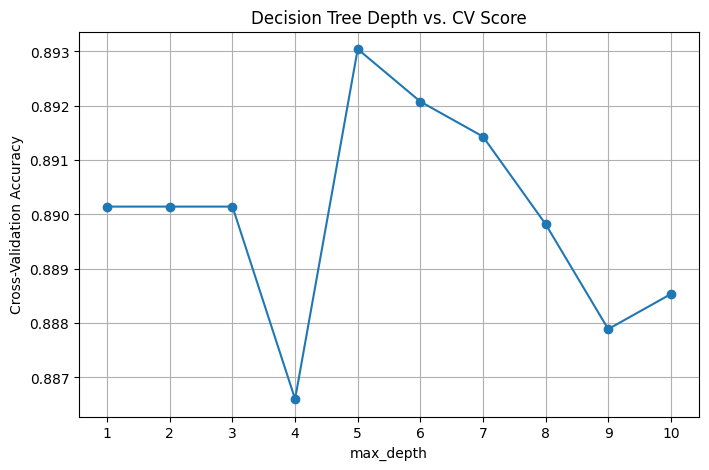

In [ ]:
# use cross-validation to choose the best max_depth value
depths = range(1, 11)
cv_scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), X_train, y_train, cv=5).mean() for d in depths]

best_depth = depths[np.argmax(cv_scores)]
print(f"Best max_depth: {best_depth}")
plt.figure(figsize=(8, 5))
plt.plot(depths, cv_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Decision Tree Depth vs. CV Score')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [ ]:
# Using Grid Search to find max_depth value
param_grid = {'max_depth': range(1, 11)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best max_depth:", grid_search.best_params_['max_depth'])


Best max_depth: 5


In [ ]:
X_train

,device_category,mobile_brand_name,geo_category
1057,1,1,4
1273,1,1,1
602,1,1,3
2080,1,1,1
2168,1,1,3
...,...,...,...
1947,1,4,1
1383,1,1,4
460,1,1,4
1793,1,1,4


In [ ]:
#For Classification
# Criterion we chosed is gini, this is used for classification and it is faster than entropy. It also works well in most cases
# max_depth = 4
clf = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=42)
clf.fit(X_train, y_train)
print(f"Accuracy when max_depth = 4: {accuracy_score(y_train, clf.predict(X_train)):.3f}")

# max_depth = 2
tem = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state=42)
tem.fit(X_train, y_train)
print(f"Accuracy when max_depth = 2: {accuracy_score(y_train, tem.predict(X_train)) :.3f}")

Accuracy when max_depth = 4: 0.893
Accuracy when max_depth = 2: 0.890


Although the best max_depth is 2 from cross-validation and grid search, we want to have a more detailed rules in our model. As long as our model has no overfitting problem, we can use a higher max_depth.

To test if our model has overfitting problem, we can compare the accuracy and AUC score, F1-Score for training set and test set. If these scores have no big differences between training and test set, then we are less like have overfitting.


Here we used 4 for max_depth and below is the test to see if there is a overfitting problem.

In [ ]:
# Test accuracy score
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Training Accuracy: 0.893
Test Accuracy: 0.891


Our accuracy is 0.94 which means that 94% of the total predictions were correct.

In [ ]:
# Test AUC score
from sklearn.metrics import roc_auc_score
train_probs = clf.predict_proba(X_train)[:, 1]
test_probs = clf.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

print(f"Training AUC: {train_auc:.3f}")
print(f"Test AUC: {test_auc:.3f}")

Training AUC: 0.811
Test AUC: 0.806


In [ ]:
# Test F1-score
from sklearn.metrics import f1_score
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)
train_f1 = f1_score(y_train, train_preds)
test_f1 = f1_score(y_test, test_preds)

print(f"Training F1-score: {train_f1:.3f}")
print(f"Test F1-score: {test_f1:.3f}")

Training F1-score: 0.415
Test F1-score: 0.397


All scores show no big difference between training and test set so we are less like have overfitting by using 4 as max_depth.

In addition, we ended up not using ```user_ltv_not_engaged_sessions``` since when this was used the only 3 features used for the tree were ```user_ltv_not_engaged_sessions```, ```user_ltv_engaged_sessions```, and ```RFV```. This tree uses more features.

When we ran the tree on max_depth = 6, all features were used but 2 features had really low feature importance: ```geo_category``` (.0053) and ```device_category``` (.00089).

In [ ]:
#feature importance
feature_importance = clf.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
features = features.sort_values(by='Importance', ascending=False)
features

,Feature,Importance
3,user_ltv_not_engaged_sessions,0.842113
0,device_category,0.064567
2,geo_category,0.046770
1,mobile_brand_name,0.046550


In [ ]:
from sklearn.tree import export_text
# Rules of our model
rules = export_text(clf, feature_names=list(X_train.columns))
print(rules)

|--- user_ltv_not_engaged_sessions <= 1.50
|   |--- user_ltv_not_engaged_sessions <= 0.50
|   |   |--- mobile_brand_name <= 3.50
|   |   |   |--- geo_category <= 3.50
|   |   |   |   |--- device_category <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- device_category >  1.50
|   |   |   |   |   |--- class: False
|   |   |   |--- geo_category >  3.50
|   |   |   |   |--- mobile_brand_name <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  1.50
|   |   |   |   |   |--- class: False
|   |   |--- mobile_brand_name >  3.50
|   |   |   |--- geo_category <= 2.50
|   |   |   |   |--- mobile_brand_name <= 5.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  5.50
|   |   |   |   |   |--- class: False
|   |   |   |--- geo_category >  2.50
|   |   |   |   |--- mobile_brand_name <= 4.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  4.50
|   |   |   |   |   |--- class: False
|   

## Variable encoding

```device_category```
* Mobile: 1
* Desktop: 2
* Other: 3

```mobile_brand_name```
* Apple: 1
* Google: 2
* Samsung: 3
* Other: 4
 * 'BLU', 'Xiaomi', 'LG', 'Mozilla', 'TCL', 'Vivo', 'other', 'Phonemax', ‘Software', 'OnePlus', 'AT&T', 'T-Mobile', 'Nuu', 'Amazon', 'Realme', 'Wiko', 'Nokia', 'Alcatel', 'JVC', 'Boost Mobile', 'ZZB', 'Wingtech', 'Hot Pepper', 'Cricket', 'Koobee', 'ZTE', 'Vortex', 'Schok', 'Cloud Mobile', 'Asus', 'Lenovo', 'Maxwest', 'Blackview'
* Microsoft: 5
* Motorola: 6

```geo_category```
* City, Dallas: 1
* City, metro area of Dallas: 2
 * 'Plano', 'Irving', 'Garland', 'Grand Prairie', 'Carrollton', 'Richardson','Mesquite','McKinney','Frisco','Allen', 'Denton', 'Lewisville', 'The Colony', 'Farmers Branch', 'Grapevine', 'Coppell', 'Rowlett', 'Rockwall', 'Sunnyvale', 'Wylie','Forney', 'Sachse','University Park','Highland Park', 'Addison', 'Balch Springs', 'Seagoville', 'Wilmer'
* Region, Texas: 3
* Country, United States: 4
* International: 5


# Calc ROC from fitting test data onto model

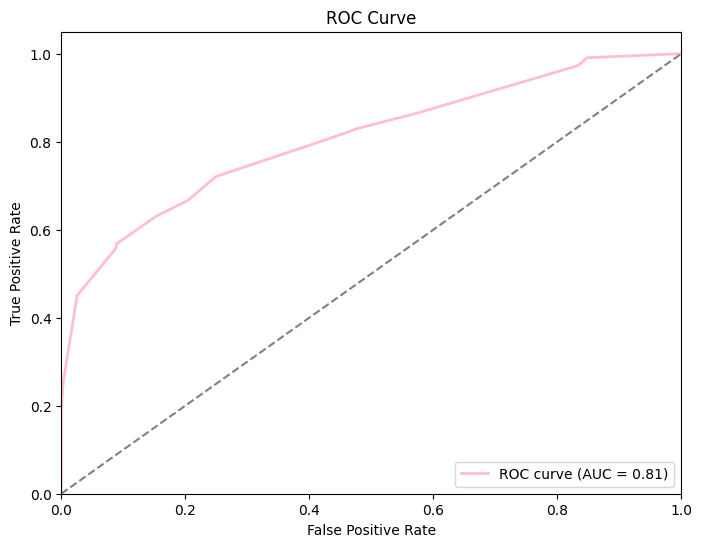

In [ ]:
# Get probability scores for the positive class
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

AUC measures how well the model separates positive (dependent variable shows true, which means the user will return) and negative (dependent variable shows false which means the user will not return) classes.

ROC AUC = 0.79 is a good score, which means 0.79 probability that the model correctly assigns a higher score to a positive case than to a negative case.

Since AUC < Accuracy, so our model may have some difficulty distinguishing between classes, especially in edge cases.

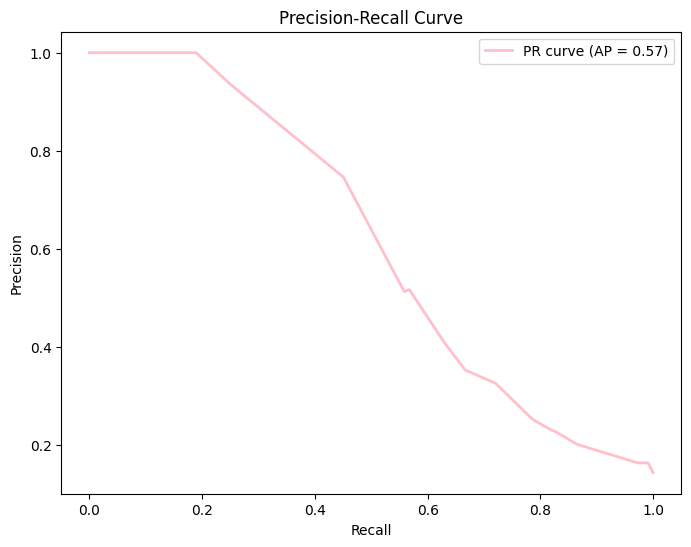

In [ ]:
# Compute Precision-Recall curve and Average Precision (AP) Score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification


precision, recall, _ = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='pink', lw=2, label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


AP (Average Precision) is the area under the Precision-Recall (PR) curve, useful for imbalanced datasets.

AP = 0.64

An AP of 0.64 means that across all recall levels, our model maintains a high level of precision — on average, 64% of the positive predictions are correct as we retrieve more and more of the true positives.

# Results

In [ ]:
df_latest_capped.columns

Index(['pseudo_user_id', 'last_active_date', 'device_category', 'city',
       'region', 'country', 'continent', 'mobile_brand_name',
       'unified_screen_name', 'ltv_engaged_duration_mins',
       'ltv_session_duration_mins', 'user_ltv_sessions',
       'user_ltv_engaged_sessions', 'occurrence_date', 'first_visit_date',
       'Recency', 'Normalized_Recency', 'Frequency', 'Normalized_Frequency',
       'Volume', 'Normalized_Volume', 'Regularity', 'Normalized_Regularity',
       'RFV', 'RFV_Tier', 'returned', 'first_visit_month',
       'occurrence_date_month', 'last_active_date_month', 'geo_category',
       'user_ltv_not_engaged_sessions'],
      dtype='object')

In [ ]:
df_latest_capped['unified_screen_name'].value_counts().head(15) #== '35th Texas Black Invitational Rodeo - Dallas Free Press'

,count
unified_screen_name,
Dallas Free Press amplifies voices in South and West Dallas,687
‘Telehealth pod’ at Salem church brings health care into Queen City neighborhood - Dallas Free Press,289
New ‘West Dallas Junior High’ sign at the entrance of former Thomas Edison school - Dallas Free Press,282
35th Texas Black Invitational Rodeo - Dallas Free Press,216
dallas journalism and content,105
Diane Ragsdale: A lifetime of community organizing in South Dallas - Dallas Free Press,103
2024 Car Show Fundraiser - Dallas Free Press,100
other,78
Harold Simmons Park — West Dallas Job Fair - Dallas Free Press,76


In [ ]:
rodeo = df_latest_capped[(df_latest_capped['user_ltv_not_engaged_sessions'] == 0) & (df_latest_capped['user_ltv_engaged_sessions'] ==1) & (df_latest_capped['unified_screen_name'] == '35th Texas Black Invitational Rodeo - Dallas Free Press')]

In [ ]:
#homepage
df_latest_capped[(df_latest_capped['user_ltv_not_engaged_sessions'] == 0) & (df_latest_capped['user_ltv_engaged_sessions'] ==1) & (df_latest_capped['unified_screen_name'] == 'Dallas Free Press amplifies voices in South and West Dallas')]

,pseudo_user_id,last_active_date,device_category,city,region,country,continent,mobile_brand_name,unified_screen_name,ltv_engaged_duration_mins,...,Regularity,Normalized_Regularity,RFV,RFV_Tier,returned,first_visit_month,occurrence_date_month,last_active_date_month,geo_category,user_ltv_not_engaged_sessions
3,1.674153e+06,2024-06-25,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,1.794217,...,1.088223,0.005882,0.007678,other,False,6,6,6,4,0.0
10,6.267112e+06,2024-08-01,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,0.188100,...,1.088223,0.005882,0.007678,other,False,8,8,8,4,0.0
13,8.776743e+06,2024-07-03,2,San Jose,California,United States,Americas,1,Dallas Free Press amplifies voices in South an...,1.805817,...,1.088223,0.005882,0.007678,other,False,7,7,7,4,0.0
24,1.419649e+07,2024-07-02,2,Dallas,Texas,United States,Americas,2,Dallas Free Press amplifies voices in South an...,4.512617,...,1.000000,0.000000,0.000000,T1,False,7,7,7,1,0.0
30,1.710642e+07,2024-07-20,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,0.184833,...,1.000000,0.000000,0.000000,T1,False,7,7,7,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,2.127329e+09,2024-07-28,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,0.843033,...,1.000000,0.000000,0.000000,T1,False,7,7,7,4,0.0
3853,2.131627e+09,2024-07-08,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,0.186100,...,1.000000,0.000000,0.000000,T1,False,7,7,7,4,0.0
3873,2.143819e+09,2024-07-28,2,Phoenix,Arizona,United States,Americas,2,Dallas Free Press amplifies voices in South an...,0.845417,...,1.088223,0.005882,0.007678,other,False,7,7,7,4,0.0
3875,2.145309e+09,2024-07-29,2,Boydton,Virginia,United States,Americas,1,Dallas Free Press amplifies voices in South an...,0.848250,...,1.088223,0.005882,0.007678,other,False,7,7,7,4,0.0


In [ ]:
rodeo['geo_category'].value_counts()

,count
geo_category,
1,51
4,41
3,39
2,18
5,3


In [ ]:
print(rules)

|--- user_ltv_not_engaged_sessions <= 1.50
|   |--- user_ltv_not_engaged_sessions <= 0.50
|   |   |--- mobile_brand_name <= 3.50
|   |   |   |--- geo_category <= 3.50
|   |   |   |   |--- device_category <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- device_category >  1.50
|   |   |   |   |   |--- class: False
|   |   |   |--- geo_category >  3.50
|   |   |   |   |--- mobile_brand_name <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  1.50
|   |   |   |   |   |--- class: False
|   |   |--- mobile_brand_name >  3.50
|   |   |   |--- geo_category <= 2.50
|   |   |   |   |--- mobile_brand_name <= 5.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  5.50
|   |   |   |   |   |--- class: False
|   |   |   |--- geo_category >  2.50
|   |   |   |   |--- mobile_brand_name <= 4.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- mobile_brand_name >  4.50
|   |   |   |   |   |--- class: False
|   

If the user had as least 2 engaged sessions, then the user is definetly a returning user. If a user had a RFV of less than or equal to 0.01, then the user is not a returning user. RFV consists of recency, normacly, and frequency.

On the other hand, lets look at if RFV is greater than 0.01. Interestly, if the user has a lifetime engaged duration in minutes less than 0.8, then the user will be a returning user. If the user lifetime engaged duration greater than 1.03 minutes, then the user will return. And if the user has enaged duration minutes between 0.8 and 1.03, then they won't return.

## Notes

Questions from last week (4/1)

1. collinearity between sessions & engaged sessions, session duration & engaged duration

  Solution: we only keeped engaged sessions and engaged duration in the model.

2. Too many redundant boolean variables

  Solution: we changed user's device_type, Geographical Categoryinto numerical value, for instance, shows 1 if user use mobile to visit the set.

3. No transformation variables, hard to intepret for decision model

4. Using feature importance

5. change max_depth value

  Solution: we used cross-validation and Grid Search to find the best max_depth value

6. check dependent variable

  Solution: we changed dependent variable, if the user ```user_ltv_sessions``` greater than 1, the the user is identified as returned.

AP (Average Precision) is the area under the Precision-Recall (PR) curve, useful for imbalanced datasets.

AP = 0.73

An AP of 0.73 means that across all recall levels, our model maintains a high level of precision — on average, 73% of the positive predictions are correct as we retrieve more and more of the true positives.